## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.axes as ax

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_all = pd.merge(mouse_metadata, study_results,
                    how = 'left', on = 'Mouse ID')
mouse_all.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grpBy = mouse_all.groupby('Drug Regimen')

summary = pd.DataFrame({'Frequency': grpBy['Sex'].count(),
                        'Mean': grpBy['Tumor Volume (mm3)'].mean(),
                        'Median': grpBy['Tumor Volume (mm3)'].median(),
                        'Variance': grpBy['Tumor Volume (mm3)'].var(),
                        'Standard Deviation': grpBy['Tumor Volume (mm3)'].std(),
                        'SEM': grpBy['Tumor Volume (mm3)'].sem()})



summary = summary.reset_index()
summary

,Drug Regimen,Frequency,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

Text(0, 0.5, 'Count')

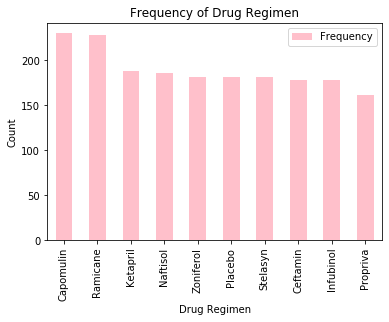

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
reg_freq = summary[['Drug Regimen','Frequency']]

reg_freq = reg_freq.sort_values('Frequency', ascending = False).set_index('Drug Regimen')

reg_freq.plot(kind = 'bar', color = 'pink')


plt.title("Frequency of Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

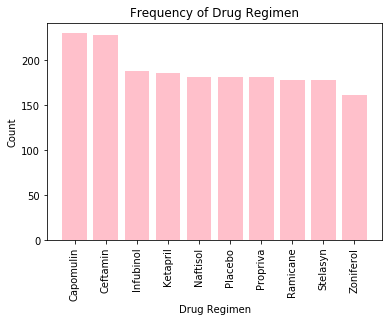

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(summary['Frequency']))
tick_locations = [value for value in x_axis]


plt.bar(x_axis,summary['Frequency'].sort_values(ascending = False), color = 'pink', align = 'center')
plt.xticks(tick_locations,summary['Drug Regimen'], rotation = 'vertical')


plt.title("Frequency of Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Count')


plt.show()

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD978DC2C8>],
      dtype=object)

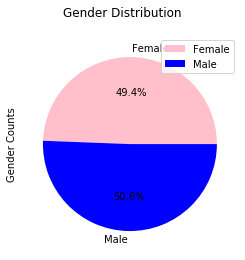

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = mouse_all[['Sex','Mouse ID']].groupby('Sex').count().rename(columns ={'Mouse ID':'Gender Counts'})

colors = ['pink','blue']
x_axis
df.plot(kind = 'pie', subplots = True, autopct = '%1.1f%%', title = 'Gender Distribution ',colors = colors)


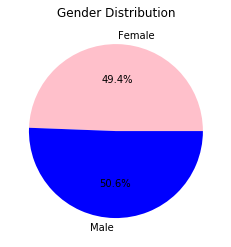

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

df = mouse_all[['Sex','Mouse ID']].groupby('Sex').count().rename(columns ={'Mouse ID': 'Gender'})
labels = ['Female','Male']

colors = ['pink','blue']

plt.pie(df['Gender'], labels = labels, autopct = '%1.1f%%',colors = colors)
plt.title('Gender Distribution')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#getting final tumor date by mouse
time_point_final_tumor = mouse_all[['Mouse ID','Timepoint']].groupby('Mouse ID').max().reset_index()


#merging back original data to get tumor size by joining on timepoint
time_point_mice = pd.merge(time_point_final_tumor, mouse_all,
                    how = 'left', on = ['Mouse ID','Timepoint']).rename(columns = {'Timepoint_x':'Final Timepoint'})

#grouping by drug regimen
grpby2= time_point_mice[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')

#creating DF of quantiles
Quantiles = pd.DataFrame({'Q1': grpby2['Tumor Volume (mm3)'].quantile(q = .25),
                         'Q2': grpby2['Tumor Volume (mm3)'].quantile(q = .5),
                         'Q3': grpby2['Tumor Volume (mm3)'].quantile(q = .75)}).reset_index()

#manually calculating IQR
Quantiles['IQR'] = Quantiles['Q3'] - Quantiles['Q1']

#calculating upper/lower bound
Quantiles['Lower Bound'] = Quantiles['Q1'] - Quantiles['IQR']*1.5
Quantiles['Upper Bound'] = Quantiles['Q3'] + Quantiles['IQR']*1.5

#sorting by smallest value to get best 4 drugs
best_drugs = time_point_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].min().sort_values().head(4)

#reducing the quantiles table to the 4 best
qbest = pd.merge(best_drugs, Quantiles,
                how = 'left', on = 'Drug Regimen').set_index('Drug Regimen')


qbest


,Tumor Volume (mm3),Q1,Q2,Q3,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,,
Ramicane,22.050126,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Capomulin,23.343598,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Infubinol,36.321346,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ceftamin,45.000000,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


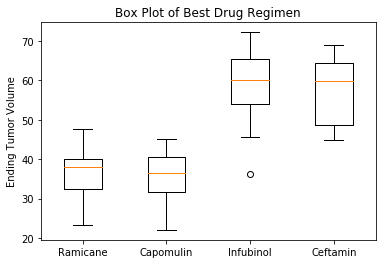

There is only one outlier of tumor volume, and it is for Infubinol


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#getting data by drug type for box plots
ramicane = time_point_mice.loc[time_point_mice['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
capomulin = time_point_mice.loc[time_point_mice['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
infubinol = time_point_mice.loc[time_point_mice['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = time_point_mice.loc[time_point_mice['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Box Plot of Best Drug Regimen')
ax.set_ylabel('Ending Tumor Volume')

ax.boxplot([capomulin,ramicane,infubinol,ceftamin])
ax.set_xticklabels(['Ramicane','Capomulin','Infubinol','Ceftamin'])

plt.show()
print('There is only one outlier of tumor volume, and it is for Infubinol')

## Line and scatter plots

As time goes on, the tumor size decreases


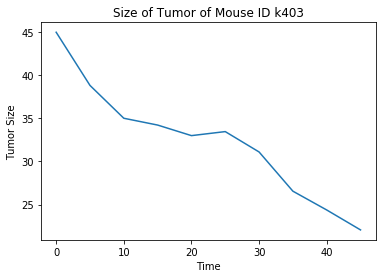

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse = mouse_all.loc[mouse_all['Mouse ID'] == 'k403',['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')

plt.xlabel('Time')
plt.ylabel('Tumor Size')
plt.title('Size of Tumor of Mouse ID k403')
plt.plot(mouse)
print('As time goes on, the tumor size decreases')

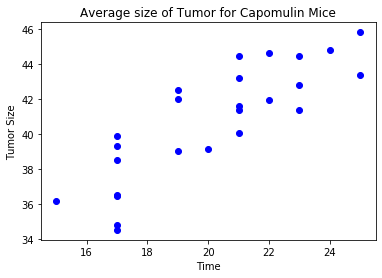

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#getting all mice that had Capomulin
coup_mice = mouse_all.loc[mouse_all['Drug Regimen'] == 'Capomulin',['Timepoint','Tumor Volume (mm3)','Mouse ID','Weight (g)']]

#grouping Capomulin mice by time, calculating average tumor size
tumor_size = coup_mice[['Mouse ID','Tumor Volume (mm3)','Weight (g)']].groupby('Mouse ID').mean().reset_index()


#creating figure for double axes
fig, ax = plt.subplots()


#plot labels
plt.title('Average size of Tumor for Capomulin Mice')
ax.set_xlabel('Time')
ax.set_ylabel('Tumor Size')

#setting first scatter plot of tumor size over time
ax.scatter(tumor_size['Weight (g)'], tumor_size['Tumor Volume (mm3)'], marker = 'o',color = 'blue')

#showing plot
plt.show()

The linear equation looks at the mouse final tumor size
using the mouse starting weight as the predictor

The pearson correlation coefficent is 0.84
To compare, the r squared value is 0.84
The linear regression model is:
estimated tumor size = 21.55 + 0.95x + e
the p-value of our coefficient is 0.0


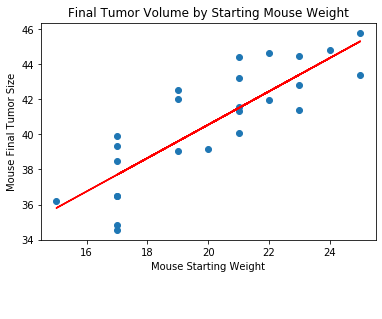

In [16]:

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# y = ending_tumor_size['Tumor Volume (mm3)']
y = tumor_size['Tumor Volume (mm3)']

# x = starting_weight['Weight (g)']
x = tumor_size['Weight (g)']

#pearson correlation coefficient
pearson = st.pearsonr(x,y)
pearson = round(pearson[0],2)

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)
p_value = round(p_value,4)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating scatter plot
plt.scatter(x,y)

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(20,30))

#creating titles and labels
plt.title('Final Tumor Volume by Starting Mouse Weight')
plt.xlabel('Mouse Starting Weight')
plt.ylabel('Mouse Final Tumor Size')

print('The linear equation looks at the mouse final tumor size')
print('using the mouse starting weight as the predictor')
print()
print("The pearson correlation coefficent is " + str(pearson))
print("To compare, the r squared value is " + str(r))
print("The linear regression model is:")
print("estimated tumor size = " + str(intercept)+' + '+str(slope) + 'x + e')
print('the p-value of our coefficient is ' + str(p_value))

In [19]:
print('We can see from the coefficient of x, that as the starting mouse')
print('weight increases by one gram, we see an increase in final tumor size of .95 mm')
print('due to the high r square value, we can tell that our model fits the data points well')
print('-------------------------------------------------------------------------------------')
print('Our p-value of our coefficient is 0, meaning that there is 99.999% probability')
print('that our coefficient of x would be in the sample')
print('-------------------------------------------------------------------------------------')
print('Lastly, we see with the Capomulin Mice, that there was a large decrease in tumor size')
print('over time')

We can see from the coefficient of x, that as the starting mouse
weight increases by one gram, we see an increase in final tumor size of .95 mm
due to the high r square value, we can tell that our model fits the data points well
-------------------------------------------------------------------------------------
Our p-value of our coefficient is 0, meaning that there is 99.999% probability
that our coefficient of x would be in the sample
-------------------------------------------------------------------------------------
Lastly, we see with the Capomulin Mice, that there was a large decrease in tumor size
over time
